# Estadística elemental

> La estadística es la ciencia que se encarga de obtener, describir e interpretar los datos” 
(Johnson & Kuby, 2008).

La estadística puede dividirse en dos grandes campos de acción: **estadística descriptiva** y **estadística inferencial**. 
- La estadística descriptiva incluye la obtención, presentación y descripción de los datos muestrales. 
- El término estadística inferencial se refiere a la técnica de interpretación de los valores - resultantes de las técnicas descriptivas y la toma de decisiones, así como a la obtención de conclusiones relativas a la población (ibid).

### Definiciones básicas
- La **población** es “la colección completa, o conjunto total de individuos, objetos o eventos cuyas propiedades serán analizadas”.
    - La población puede ser finita o infinita (según si los elementos de la misma se pueden enumerar - fácilmente o no). 
    - A menudo, aún con poblaciones finitas, el número de elementos es muy grande, por lo que se suele trabajar con una muestra.
- Una **muestra** es un subconjunto de la población, y está constituida por individuos, objetos o elementos seleccionados de la población.
- Cuando trabajamos con la población, los valores numéricos que resumen los datos se llaman **parámetros**. 
- Si estamos trabajando con una muestra, esos mismos valores numéricos se conocen como **estadísticos**.
- Una **variable** “es una característica de interés relacionada con cada elemento individual de una población o muestra”. Parámetros y estadísticos resumen los valores de las variables.
    - Es importante tener en cuenta que los parámetros tienen un valor fijo, pero no así los estadísticos. 
    - Un estadístico puede variar, y de hecho lo hace, cada vez que se selecciona una muestra distinta de la - población. Esto, que ahora mencionamos de pasada, es una de las columnas vertebrales de lo que vendrá después.
- Un **dato** “es el valor de la variable asociada a un elemento de la población o muestra. Este valor puede ser un número, una palabra o un símbolo”.
- Los **datos** “son el conjunto de valores que se obtienen de la variable a partir de cada uno de los elementos que pertenecen a la muestra”.
- Finalmente, en estadística, un **experimento** se define como “una actividad planificada cuyos resultados producen un conjunto de datos”.

#### Ejercicio:
Si queremos determinar la nota media obtenida en los exámenes de matemáticas por los estudiantes de una universidad, en el año académico 2024-2025:
Define: 
- La población:
- Una muestra:
- La variable:
- Un dato:
- Los datos:
- El experimento:
- El parámetro:
- El estadístico:

## Experimento

Vamos a hacer un pequeño experimento, consistente en:

- Generar con Python una serie de notas de matemáticas de alumnos, que será nuestra población, y calcularemos la media de la población. Este será nuestro parámetro.
- De esa población, vamos a seleccionar de forma aleatoria un subconjunto de datos (una muestra), y vamos a calcular la nota media de esa muestra. Este será nuestro estadístico.
- Repetiremos el paso 2 varias veces, seleccionando aleatoriamente datos de la población, y volveremos a calcular la media.

### Generación de datos


In [2]:
import pandas as pd
import numpy as np
import random
import string
 
# Establecer semillas para la reproducibilidad
np.random.seed(42)
random.seed(42)
 
# Función para generar id_estudiante alfanuméricos aleatorios
def generar_id_estudiante(n):
    ids = []
    for _ in range(n):
        id_estudiante = ''.join(random.choices(string.ascii_uppercase + string.digits, k=8))
        ids.append(id_estudiante)
    return ids
 
# Generar datos
num_estudiantes_por_grupo = 40
total_estudiantes = num_estudiantes_por_grupo * 4
num_notas = 10
 
ids = generar_id_estudiante(total_estudiantes)
asignatura = 'Matemáticas'
temas = [f'Tema {i+1}' for i in range(num_notas)]
fecha_inicio = pd.Timestamp('2024-09-01')
 
# Función para generar tiempo de estudio con correlación positiva con notas
def generar_tiempo_estudio(notas, media=270, sd=60, correlacion=0.75):
    ruido = np.random.normal(0, sd, len(notas))
    tiempo_estudio = media + correlacion * (notas - np.mean(notas)) + ruido
    return tiempo_estudio.clip(60, 480).astype(int)
 
# Generar las notas, fechas y otras columnas
data = {
    'id_estudiante': [],
    'asignatura': [],
    'tema': [],
    'fecha': [],
    'nota': [],
    'calificacion': [],
    'estatura': [],
    'sexo': [],
    'tiempo_estudio': [],
    'grupo': []
}
 
# Grupos disponibles
grupos = ['A', 'B', 'C', 'D']
num_grupos = len(grupos)
 
# Asignar aleatoriamente los estudiantes a los grupos
grupo_asignado = np.repeat(grupos, num_estudiantes_por_grupo)
random.shuffle(grupo_asignado)
 
for idx, id_estudiante in enumerate(ids):
    fechas = [fecha_inicio + pd.DateOffset(weeks=i*4) for i in range(num_notas)]
    notas = np.random.normal(6.5, 1, num_notas).clip(0, 10)
    estatura = np.random.uniform(150, 190, num_notas)
    sexo = random.choice(['H', 'M'])
 
    tiempo_estudio = generar_tiempo_estudio(notas)
 
    for i in range(num_notas):
        data['id_estudiante'].append(id_estudiante)
        data['asignatura'].append(asignatura)
        data['tema'].append(temas[i])
        data['fecha'].append(fechas[i])
        data['nota'].append(round(notas[i], 2))
 
        # Asignar calificación basada en la nota
        if 9 <= notas[i] <= 10:
            calificacion = 'sobresaliente'
        elif 7 <= notas[i] < 9:
            calificacion = 'notable'
        elif 5 <= notas[i] < 7:
            calificacion = 'aprobado'
        else:
            calificacion = 'suspenso'
 
        data['calificacion'].append(calificacion)
        data['estatura'].append(estatura[i])
        data['sexo'].append(sexo)
        data['tiempo_estudio'].append(tiempo_estudio[i])
        data['grupo'].append(grupo_asignado[idx])
 
# Crear el DataFrame
df = pd.DataFrame(data)
 
# Mostrar el DataFrame
print(df)

     id_estudiante   asignatura     tema      fecha  nota calificacion  \
0         XAJI0Y6D  Matemáticas   Tema 1 2024-09-01  7.00     aprobado   
1         XAJI0Y6D  Matemáticas   Tema 2 2024-09-29  6.36     aprobado   
2         XAJI0Y6D  Matemáticas   Tema 3 2024-10-27  7.15      notable   
3         XAJI0Y6D  Matemáticas   Tema 4 2024-11-24  8.02      notable   
4         XAJI0Y6D  Matemáticas   Tema 5 2024-12-22  6.27     aprobado   
...            ...          ...      ...        ...   ...          ...   
1595      FNKOMV2X  Matemáticas   Tema 6 2025-01-19  4.28     suspenso   
1596      FNKOMV2X  Matemáticas   Tema 7 2025-02-16  7.87      notable   
1597      FNKOMV2X  Matemáticas   Tema 8 2025-03-16  5.41     aprobado   
1598      FNKOMV2X  Matemáticas   Tema 9 2025-04-13  7.76      notable   
1599      FNKOMV2X  Matemáticas  Tema 10 2025-05-11  7.45      notable   

        estatura sexo  tiempo_estudio grupo  
0     157.272999    H             357     C  
1     157.336180   

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_estudiante   1600 non-null   object        
 1   asignatura      1600 non-null   object        
 2   tema            1600 non-null   object        
 3   fecha           1600 non-null   datetime64[ns]
 4   nota            1600 non-null   float64       
 5   calificacion    1600 non-null   object        
 6   estatura        1600 non-null   float64       
 7   sexo            1600 non-null   object        
 8   tiempo_estudio  1600 non-null   int64         
 9   grupo           1600 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 125.1+ KB


### Reto
- A final de año académico 2024-2025, el responsable de orientación escolar ha pedido que se calcule la nota media de los exámenes de matemáticas.
- No se tiene acceso a la tabla anterior, por lo que tienen que averiguar, de alguna forma, las notas en cuestión. Pero estamos hablando de 1.600 notas. Aunque pudieran entrevistar a todos los alumnos (160), y preguntarles por sus notas en cada uno de los exámenes, no se llegaría a tiempo para entregar el trabajo (les han dado una semana de plazo). Por lo tanto, se decide trabajar con una muestra aleatoria.
- Por tanto, se va a trabajar con 40 notas (10 notas por grupo), y para recolectarlas van a hacer lo siguiente:
    1. En cada grupo, le perdirán a un alumno que saque 10 papeletas de una cesta que contiene 40 papeletas con los nombres de cada estudiante del grupo correspondiente. No hace falta devolver la papeleta a la cesta entre extracción y extracción, con lo que se aseguran de que están eligiendo a 10 alumnos distintos por grupo. Es lo que se conoce como muestreo aleatorio simple sin reemplazo.
    2. En otra cesta, meterán 10 papeletas con los temas de los exámenes (tema 1, tema 2, tema 3…), y le pedirán a cada uno de los alumnos seleccionados en el paso 1 que saque una papeleta, diga el tema que le ha tocado, y la nota que obtuvo en ese examen, y que luego devuelva la papeleta a la cesta. Es decir, es posible que dentro de un grupo se repita un tema. Esto se llama muestreo aleatorio simple con reemplazo.
    3. Los pasos 1 y 2 se repiten en cada uno de los 4 grupos.

**Nota:** Se dan tantos detalles porque la forma de recolectar las notas es muy importante. La selección debe ser lo más aleatoria posible para evitar sesgos.

### Simulación de experimento

In [10]:
def calculo_experimental_nota_media():
    # Lista de grupos
    grupos = df['grupo'].unique()

    # Seleccionar al azar 10 alumnos de cada grupo (sin reemplazo)
    alumnos_muestra = []
    for grupo in grupos:
        alumnos_grupo = df[df['grupo'] == grupo]['id_estudiante'].unique()
        muestra_grupo = random.sample(list(alumnos_grupo), 10)
        alumnos_muestra.extend(muestra_grupo)

    # Seleccionar al azar un tema para cada alumno de la muestra (con reemplazo)
    temas_muestra = {}
    for alumno in alumnos_muestra:
        notas_alumno = df[df['id_estudiante'] == alumno]
        tema_elegido = random.choice(notas_alumno['tema'].unique())
        temas_muestra[alumno] = tema_elegido

    # Crear el DataFrame de muestra con los temas seleccionados
    dfs_alumnos_temas = []
    for alumno, tema in temas_muestra.items():
        df_alumno_tema = df[(df['id_estudiante'] == alumno) & (df['tema'] == tema)]
        dfs_alumnos_temas.append(df_alumno_tema)

    df_muestra = pd.concat(dfs_alumnos_temas, ignore_index=True)

    # Calcular la nota media de la muestra
    nota_media_muestra_1 = df_muestra['nota'].mean()

    # Mostrar el DataFrame de muestra y la nota media
    print("DataFrame de muestra:")
    print(df_muestra.head())
    print()
    print(f"Nota media de la muestra: {nota_media_muestra_1:.2f}")

    return df_muestra

#### Repetir el experimento 5 veces y apuntar  la nota media. Compararla con la nota media real

In [8]:
# Nota media real
media_nota = round(df['nota'].mean(), 2)
print(f"La media de la columna 'nota' es: {media_nota}")

La media de la columna 'nota' es: 6.48


In [11]:
df_muestras = {}
for i in range(5):
    print('\n**** Experimento {0}'.format(i+1))
    df_muestras[i] = calculo_experimental_nota_media()


# print('\n >>>> df_muestras:\n', df_muestras)


**** Experimento 1
DataFrame de muestra:
  id_estudiante   asignatura    tema      fecha  nota calificacion  \
0      A7TZ0YNC  Matemáticas  Tema 2 2024-09-29  7.11      notable   
1      B1QX6GVW  Matemáticas  Tema 8 2025-03-16  6.20     aprobado   
2      F6A4FEJG  Matemáticas  Tema 1 2024-09-01  5.39     aprobado   
3      PVS7HZIO  Matemáticas  Tema 2 2024-09-29  6.22     aprobado   
4      3T60RJIW  Matemáticas  Tema 3 2024-10-27  5.90     aprobado   

     estatura sexo  tiempo_estudio grupo  
0  183.042705    H             300     C  
1  164.170853    M             156     C  
2  156.976371    M             283     C  
3  187.998447    H             299     C  
4  186.250183    H             313     C  

Nota media de la muestra: 6.32

**** Experimento 2
DataFrame de muestra:
  id_estudiante   asignatura     tema      fecha  nota calificacion  \
0      KKV9RFTM  Matemáticas   Tema 2 2024-09-29  6.98     aprobado   
1      UZFK8UT0  Matemáticas   Tema 4 2024-11-24  5.09     apro

### Distribución de datos
mostraremos la distribución de las notas, tanto de la población, como de una de las muestras, y luego compararemos esas distribuciones.

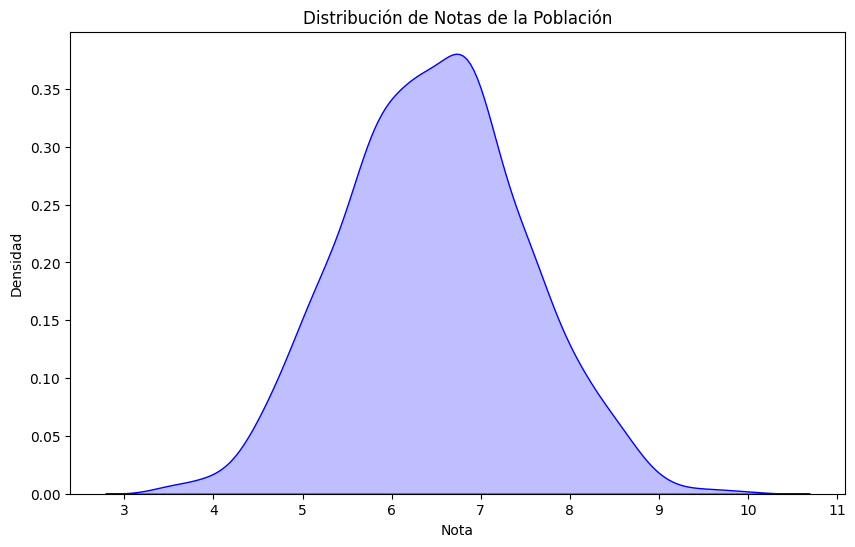

In [12]:
# Población
import seaborn as sns
import matplotlib.pyplot as plt
 
# Graficar la densidad de las notas usando Seaborn (población=
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['nota'], fill=True, color='blue')
plt.title('Distribución de Notas de la Población')
plt.xlabel('Nota')
plt.ylabel('Densidad')
plt.show()

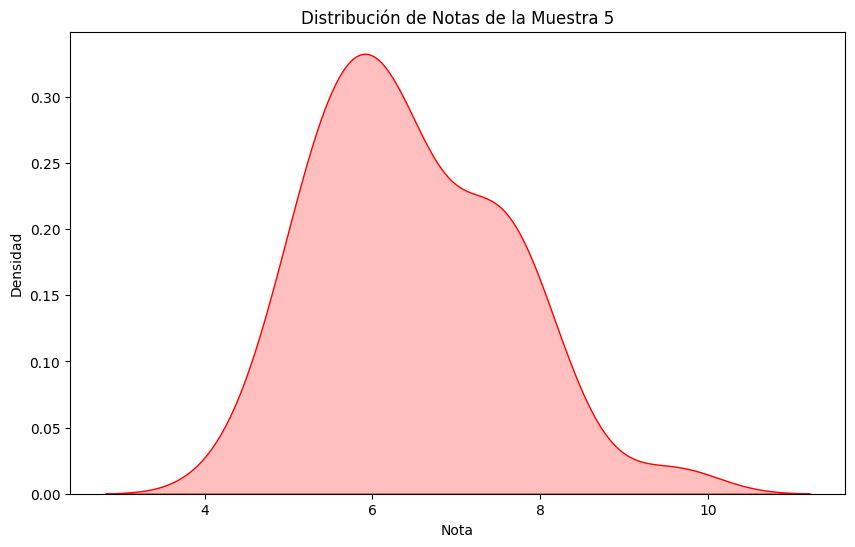

In [13]:
# Muestra 5
# Graficar la densidad de las notas usando Seaborn (muestra 5)
plt.figure(figsize=(10, 6))
df_muestra_5 = df_muestras[4]
sns.kdeplot(data=df_muestra_5['nota'], fill=True, color='red')
plt.title('Distribución de Notas de la Muestra 5')
plt.xlabel('Nota')
plt.ylabel('Densidad')
plt.show()

Las notas de la muestra 5 tienen una media distinta, como es de esperar, pero también una distribución ligeramente diferente.

¡Vamos a obervar cómo se distribuyen las notas de las distintas muestras, junto con la original!

¿Qué conclusiones sugiere el gráfico?

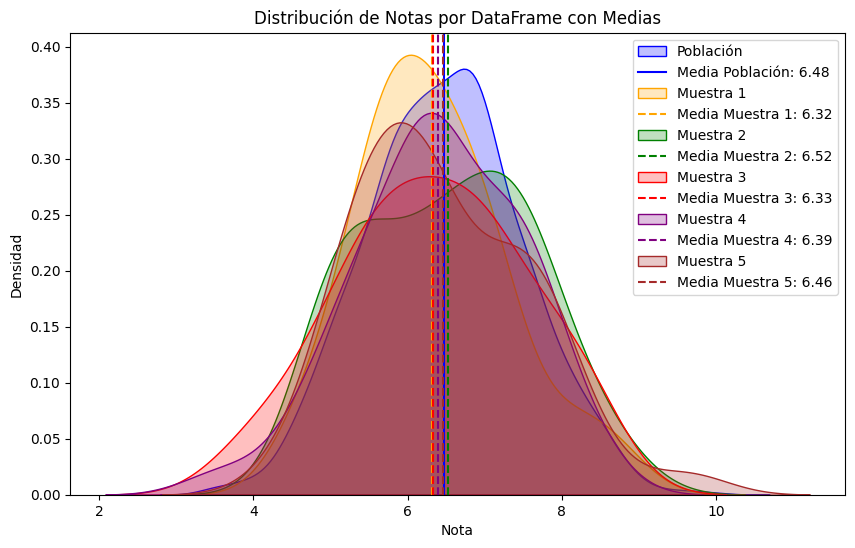

In [14]:
# Lista de DataFrames y etiquetas
dataframes = [df, df_muestras[0], df_muestras[1], df_muestras[2], df_muestras[3], df_muestras[4]]
labels = ['Población', 'Muestra 1', 'Muestra 2', 'Muestra 3', 'Muestra 4', 'Muestra 5']
 
# Colores específicos para cada muestra
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
 
# Configuración del gráfico
plt.figure(figsize=(10, 6))
 
# Graficar densidad de notas para cada DataFrame
for i, df_temp in enumerate(dataframes):
    # Determinar color y estilo de la línea vertical
    color = colors[i]
    linestyle = '-' if i == 0 else '--'
 
    # Graficar densidad de notas
    sns.kdeplot(data=df_temp['nota'], label=labels[i], fill=True, color=color)
 
    # Calcular y graficar la media como línea vertical punteada
    mean_nota = df_temp['nota'].mean()
    plt.axvline(x=mean_nota, linestyle=linestyle, color=color, label=f'Media {labels[i]}: {mean_nota:.2f}')
 
plt.title('Distribución de Notas por DataFrame con Medias')
plt.xlabel('Nota')
plt.ylabel('Densidad')
plt.legend()
plt.show()

La línea azul continua representa la media de la población. Las líneas discontinuas son las medias de las muestras.

Un estadístico puede variar, y de hecho lo hace, cada vez que se selecciona una muestra distinta de la población, pero el parámetro de la población permanece fijo.

## Tipos de variables
A continuación vamos tratar otro tema muy importante, al que se le suele prestar poca atención, pero que es **esencial** para pisar en terreno firme: los tipos de variables estadísticas.

- En el campo que nos ocupa hay **dos tipos** fundamentales de variables: las que aportan **información cualitativa**, y las que aportan **información cuantitativa**.
    - Según, Johnson y Kuby, una variable **cualitativa, de atributos o categórica**, «es una variable que **clasifica o describe** a un elemento de una población«.
    - Una variable **cuantitativa o numérica** es aquella que **«cuantifica un elemento de una población«**.

- Es un error común definir a las variables numéricas diciendo que son aquellas cuyo valor es un número. Las variables numéricas son aquellas que **tiene sentido sumar y promediar**.
- Los códigos postales o los IDs, por ejemplo, suelen ser números, pero no son variables numéricas. Los años también son números, pero tampoco son variables numéricas. No tiene sentido promediar códigos postales, o IDs. Tampoco se suele coger una lista de años, para sacar el promedio de esa lista.
    - ¿Alguna vez a visto algún estudio en el que se diga que el año promedio en que pasaron las cosas fue en 2022.5, que es lo que sale de promediar los años 2021, 2022, 2023 y 2024?
    - ¿O algún análisis en los que la suma de los años como tales tenga relevancia? De cara sacar información de un conjunto de datos, ¿nos sirve de algo saber que 2021, 2022, 2023 y 2024 suman 8.090?

### **Variables cualitativas**
Dentro de las variables cualitativas o categóricas, nos encontramos con variables:

- **Nominales**: Una variable nominal «es una variable cualitativa que caracteriza (describe o identifica) a un elemento de una población. Para los datos resultantes de una variable nominal, las operaciones aritméticas no sólo carecen de sentido, sino que tampoco se puede asignar un orden a las categorías«.
    - Como ejemplos de variables nonimales podemos poner el color de ojos, o de pelo. La cuidad de residencia, el sexo, el género de una película, el estado civil, la condición de fumador o no fumador, o de estado de salud (enfermo o sano).
    - Una variable nominal, además, puede o no ser dictómica: que sólo adoptan dos valores posibles (sí o no, 0 ó 1). En los ejemplos anteriores, el sexo (hombre o mujer), se suele tratar como dicotómica (aunque es posible encontrar cojuntos de datos en los que hay más de dos valores (hombre, mujer, no-binario). En ese caso la variable no es dicotómica.
    - El estado civil podría serlo, si en el conjunto de datos analizado sólo adopta los valores de casado o soltero.
    - Finalmente, si el estado de salud adopta los valores de enfermo o sano, también sería dicotómica.

- **Ordinales**: «es una variable cualitativa que presenta una posición, o clasificación, ordenada«.
    - Un ejemplo de variable ordinal puede ser la valoración que se le da a una película, en una escala de 1 a 5 (aunque según que casos es posible tratar dicha valoración como una variable numérica).
    - Otro ejemplo, quizá más claro, es la clasificación con letras de un determinado elemento. Por ejemplo, una habitación clasificada con las letras A, B y C según la calidad de la habitación (o con las palabras «lujo», normal, «barata»). En orden de calidad creciente, «barata» va antes que «normal», y «normal» antes que «lujo».

#### Representación gráfica
- En general, cuando queremos representar variables cualitativas se utilizan gráficos de barras. 
- En uno de los ejes se muestran los valores que toma la variable, y en el otro la frecuencia con la que aparece dicho valor en el conjunto de datos. 
- Las barras adoptan una altura proporcional a dicha frecuencia (si se quiere saber más sobre frecuencias de datos, recomendamos leer el segundo artículo de esta serie).

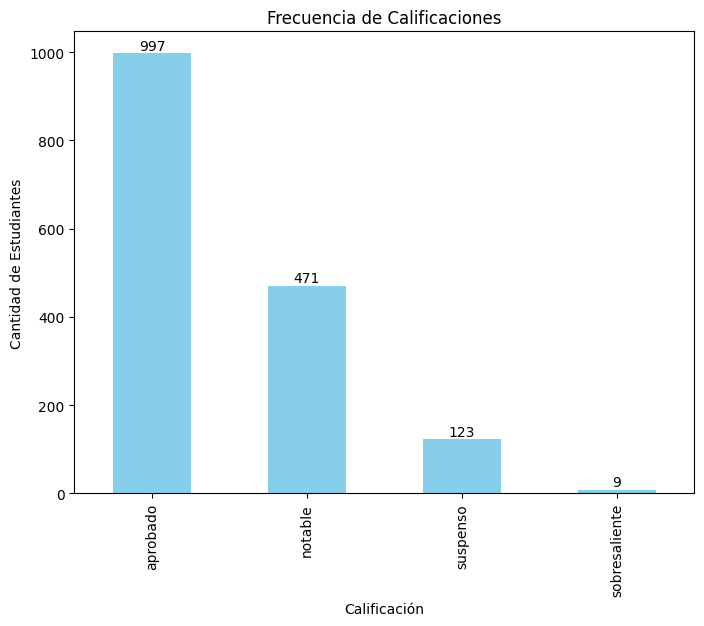

In [15]:
import matplotlib.pyplot as plt
 
# Contar las ocurrencias de cada calificación
conteo_calificaciones = df['calificacion'].value_counts()
 
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
barras = conteo_calificaciones.plot(kind='bar', color='skyblue')
 
# Añadir título y etiquetas
plt.title('Frecuencia de Calificaciones', fontsize=12)
plt.xlabel('Calificación', fontsize=10)
plt.ylabel('Cantidad de Estudiantes', fontsize=10)
 
# Añadir los valores de conteo dentro de cada barra
for i in barras.containers:
    barras.bar_label(i, labels=[f'{v}' for v in conteo_calificaciones], label_type='edge', fontsize=10)
 
# Mostrar gráfico
plt.show()

Una forma alternativa es presentar la frecuencia relativa (es decir, el porcentaje de veces que la variable adquiere determinado valor):

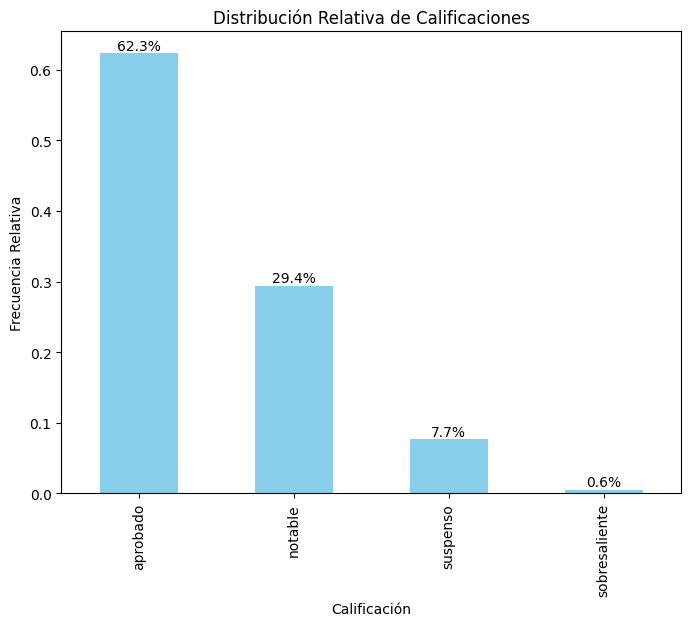

In [16]:
import matplotlib.pyplot as plt
 
# Calcular la frecuencia relativa de cada calificación
frecuencia_relativa = df['calificacion'].value_counts(normalize=True)
 
# Crear el gráfico de barras con frecuencia relativa
plt.figure(figsize=(8, 6))
barras = frecuencia_relativa.plot(kind='bar', color='skyblue')
 
# Añadir título y etiquetas
plt.title('Distribución Relativa de Calificaciones', fontsize=12)
plt.xlabel('Calificación', fontsize=10)
plt.ylabel('Frecuencia Relativa', fontsize=10)
 
# Añadir los valores de frecuencia relativa dentro de cada barra
for i in barras.containers:
    barras.bar_label(i, labels=[f'{v:.1%}' for v in frecuencia_relativa], label_type='edge', fontsize=10)
 
# Mostrar gráfico
plt.show()

Es frecuente utilizar gráficos de sectores (o de tartas) para mostrar esta misma información.

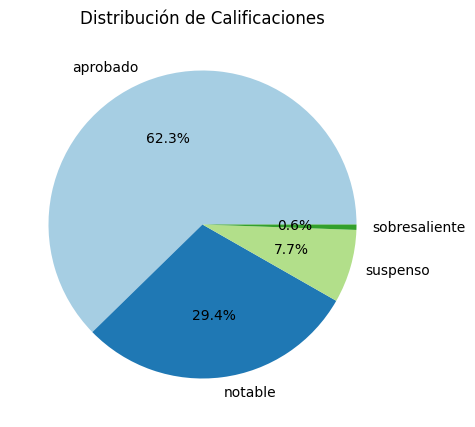

In [17]:
import matplotlib.pyplot as plt
 
# Calcular la frecuencia relativa de cada calificación
frecuencia_relativa = df['calificacion'].value_counts(normalize=True)
 
# Crear el gráfico de tarta
plt.figure(figsize=(5, 5))
plt.pie(frecuencia_relativa, labels=frecuencia_relativa.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
 
# Añadir título
plt.title('Distribución de Calificaciones', fontsize=12)
 
# Mostrar gráfico
plt.show()

**Nota:** cuando la variable cualitativa adquiere más de seis valores distintos, los gráficos de tarta no son una buena opción. En ese caso, las barras son siempre la elección correcta.

### **Variables numéricas**

#### **Variable discreta**

Es «una variable cuantitativa que puede asumir un número contable (o finito) de valores.

- Intuitivamente, una variable discreta puede asumir los valores correspondientes a puntos aislados a lo largo de un intervalo de recta. Es decir, entre dos valores cualesquiera siempre hay un hueco.
- Esto esto último es importante: «…entre dos valores cualesquiera siempre hay un hueco.
- Un ejemplo de variable discreta es el número de hijos que tiene una pareja: 1, 2, 3, 4… No es posible tener 3.254893 hijos.

##### Representación gráfica de variables discretas

Histogramas:  Una variable discreta también se puede representar con gráficos de barras, aunque lo normal es representarlas mediante histogramas, sobre todo si adquieren un elevado número de valores. Los histogramas son similares a los gráficos de barras, con la salvedad de que las barras no están separadas entre sí.

El ancho de cada barra (denominada también como «contenedor») representa el intervalo de valores incluidos en cada contenedor. La altura de cada barra, o contenedor, es proporcional al número de datos incluidos dentro del mismo.

El siguiente gráfico muestra la distribución de las notas de nuestro conjunto de datos:

Bordes de los bins: [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]


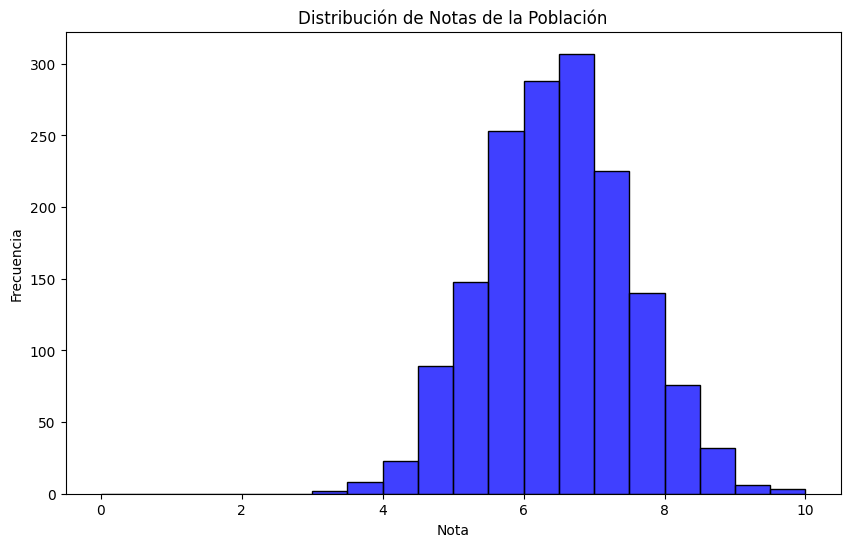

In [18]:
# Definir los bordes de los bins
bins = np.linspace(0, 10, 21)  # 21 porque queremos 20 intervalos
 
# Imprimir los bordes de los bins
print("Bordes de los bins:", bins)
 
# Graficar el histograma de las notas usando Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df['nota'], bins=bins, kde=False, color='blue')
plt.title('Distribución de Notas de la Población')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.show()

También se suele utilizar el Diagrama de Frecuencias Acumuladas. El siguiente código discretiza las notas redondeándolas a enteros, y nuestra el diagrama.


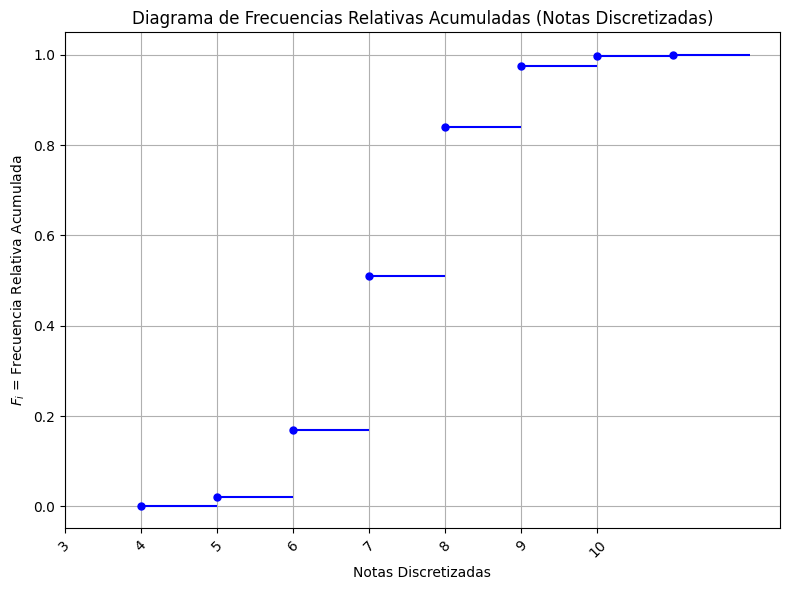

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
# Redondear las notas hacia el entero más cercano
df['nota_discretizada'] = np.round(df['nota']).astype(int)
 
# Definir los límites de los bins
bins = np.arange(1, 12, 1)  # Limites [1, 2, ..., 11] para incluir el 10 redondeado
 
# Calcular las frecuencias relativas y acumuladas para las notas discretizadas
frecuencia_relativa_notas = df['nota_discretizada'].value_counts(normalize=True).sort_index()
frecuencia_acumulada_notas = frecuencia_relativa_notas.cumsum()
 
# Crear el diagrama de frecuencias acumuladas sin líneas verticales
plt.figure(figsize=(8, 6))
 
# Dibujar las líneas horizontales de frecuencias acumuladas con saltos de alturas distintas
for i in range(1, len(frecuencia_acumulada_notas)):
    plt.hlines(frecuencia_acumulada_notas.iloc[i-1], i, i+1, colors='blue')
 
# Añadir la última línea horizontal
plt.hlines(frecuencia_acumulada_notas.iloc[-1], len(frecuencia_acumulada_notas), len(frecuencia_acumulada_notas) + 1, colors='blue')
 
# Añadir puntos en el extremo izquierdo de cada línea
x_points = np.arange(1, len(frecuencia_acumulada_notas) + 1)
y_points = frecuencia_acumulada_notas.values
plt.scatter(x_points, y_points, color='blue', s=25, marker='o', zorder=5)  # Tamaño de los puntos reducido
 
# Etiquetas en el eje X
plt.xticks(range(len(frecuencia_acumulada_notas)), frecuencia_acumulada_notas.index.astype(str), rotation=45)
 
# Añadir título y etiquetas
plt.title('Diagrama de Frecuencias Relativas Acumuladas (Notas Discretizadas)', fontsize=12)
plt.xlabel('Notas Discretizadas', fontsize=10)
plt.ylabel('$F_i$ = Frecuencia Relativa Acumulada', fontsize=10)
plt.grid(True)
 
# Mostrar gráfico
plt.tight_layout()
plt.show()

Aquí, nos limitaremos a decir que la altura de cada barra indica el porcentaje de notas son inguales o inferiores a un valor concreto. Como los datos son discretos, vemos saltos o escalones. El punto en el extremo izquierdo de cada barra indica que el valor inferior de cada intervalo está incluido en él. El valor superior no, puesto que pertence al intervalo siguiente.

Este gráfico nos dice, por ejemplo, que cerca del 50% de las notas son inferiores iguales o inferiores a 7. La altura en la que se encuentra la barra, por tanto, es proporcional al porcentaje de valores que son iguales o inferiores al valor que marca el punto.

El tamaño de los saltos por su parte, es proporcional a la diferencia de porcentaje entre un valor y otro. Por ejemplo, entre el 7 y el 10, la diferencia es de un 50% (pasamos del 50% al 100% de los datos).

#### **Variable continua**

Es «una variable cuantitativa que puede asumir una cantidad incontable de valores. 
- Intuitivamente, una variable continua puede asumir cualquier valor a lo largo de un intervalo de recta, incluyendo cualquier valor posible entre dos variables determinadas«.
    - Es decir no hay huecos en el intervalo analizado.
- Como ejemplos de variables continuas, podemos poner la estatura y el peso de una persona. Aunque la persona más bajita del mundo mida 62 centímetros, y la más alta mida 251 centímetros, dentro de ese intervalo podemos encontrarnos con cualquier número si empezamos a medir gente. La cantidad de números dentro de ese intervalo es infinita.
- Es común leer, u oir, aquello de que una variable continua es aquella que tiene decimales, pero si los valores que asume la variable son, por ejemplo, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5… y así sucesivamente, la variable es discreta. Aumenta en saltos de 0.5, y entremedio no hay otros valores. Los decimales no garantizan que la variable sea continua.

##### Representación gráfica de las variables continuas

Las variables continuas también se pueden representar mediante histogramas, siempre que las discreticemos antes en contenedores.

Sin embargo, es frecuente utilizar los gráficos de densidad. A continuación mostramos la distribución de estaturas de los alumnos:

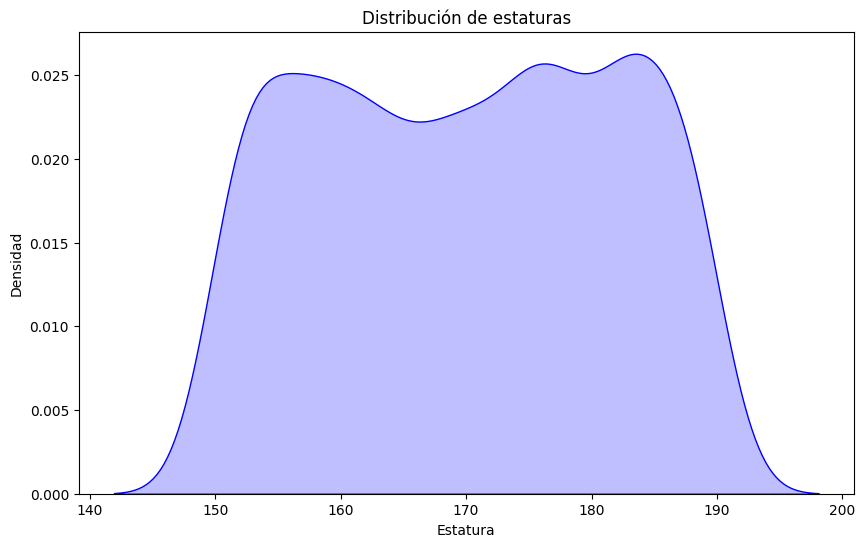

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Graficar la densidad de las estaruras usando Seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['estatura'], fill=True, color='blue')
plt.title('Distribución de estaturas')
plt.xlabel('Estatura')
plt.ylabel('Densidad')
plt.show()


En general, toda variable numérica puede ser representada con histogramas y mediante gráficos de frecuencia acumulada. 
Existen otras visualizaciones, como los gráficos de **Boxplot** y sus distintas versiones, pero los revisaremos tras haber estudiado antes las medididas de posición.

### Análisis de las variables del dataset de notas

`.info()` nos da la lista de variables y la tipificación de las mismas…

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_estudiante      1600 non-null   object        
 1   asignatura         1600 non-null   object        
 2   tema               1600 non-null   object        
 3   fecha              1600 non-null   datetime64[ns]
 4   nota               1600 non-null   float64       
 5   calificacion       1600 non-null   object        
 6   estatura           1600 non-null   float64       
 7   sexo               1600 non-null   object        
 8   tiempo_estudio     1600 non-null   int64         
 9   grupo              1600 non-null   object        
 10  nota_discretizada  1600 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 137.6+ KB


Como podemos ver, en la columna Dtype, Python nos dice que la variable id_estudiante es un «object», que fecha es «datetime64[ns]», que nota es «float», que tiempo de estudio es «int64». etc…

Esto es útil en cierta medida, porque en principio las variables tipo «object» serán cualitativas, y las de tipo «int64» y «float64» serán numéricas. Pero hasta aquí llega la ayuda.

**Para determinar la verdadera naturaleza de las variables, más allá de esto, es necesario estudiar nuestro conjunto de datos en profundidad.**

Podría pasar, por ejemplo, que tuviéramos otra variable, que fuera «aprobado», y que en el dataframe se haya codificado como 1 (uno), en los casos en los que el alumno ha aprobado el examen, y como 0 (cero), si ha suspendido. En ese caso, Python, en su inocencia, nos dirá que la variable es «Int64». 

Pero en realidad es una variable nominal dicotómica.

**Vamos a comprobarlo**: Vamos a añadir a nuestro dataframe con las notas la columna «aprobado», asignando un 1 (uno) si la calificación es distinta de «suspenso», y un 0 (cero), si es igual a «suspenso».

In [22]:
# Añadir la columna "aprobado"
df['aprobado'] = df['calificacion'].apply(lambda x: 0 if x == 'suspenso' else 1)
 
# Mostrar el DataFrame con la nueva columna "aprobado"
print(df.head())

  id_estudiante   asignatura    tema      fecha  nota calificacion  \
0      XAJI0Y6D  Matemáticas  Tema 1 2024-09-01  7.00     aprobado   
1      XAJI0Y6D  Matemáticas  Tema 2 2024-09-29  6.36     aprobado   
2      XAJI0Y6D  Matemáticas  Tema 3 2024-10-27  7.15      notable   
3      XAJI0Y6D  Matemáticas  Tema 4 2024-11-24  8.02      notable   
4      XAJI0Y6D  Matemáticas  Tema 5 2024-12-22  6.27     aprobado   

     estatura sexo  tiempo_estudio grupo  nota_discretizada  aprobado  
0  157.272999    H             357     C                  7         1  
1  157.336180    H             256     C                  6         1  
2  162.169690    H             274     C                  7         1  
3  170.990257    H             185     C                  8         1  
4  167.277801    H             236     C                  6         1  


In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_estudiante      1600 non-null   object        
 1   asignatura         1600 non-null   object        
 2   tema               1600 non-null   object        
 3   fecha              1600 non-null   datetime64[ns]
 4   nota               1600 non-null   float64       
 5   calificacion       1600 non-null   object        
 6   estatura           1600 non-null   float64       
 7   sexo               1600 non-null   object        
 8   tiempo_estudio     1600 non-null   int64         
 9   grupo              1600 non-null   object        
 10  nota_discretizada  1600 non-null   int64         
 11  aprobado           1600 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 150.1+ KB


- Antes de continuar, debemos explicar una cosa: en este caso, en el que hemos creado un dataframe de ejemplo, conocemos la naturaleza de cada variable de antemano, y el tipo de valores que contienen.
- En la vida real, esto no es así. Lo normal es que nos encontremos con conjunto de datos, de miles o millones de líneas y quizá cientos de variables, de las que NO SABEMOS NADA, más allá de una descripción somera.


**Ejercicio: revisemos variable por variable.**
- Para cada variable, obtén una muestra y determina el tipo de variable que debería ser, según la clasificación anterior.
- Determina su utilidad
- Grafícala usando el tipo de gráfico recomendado

In [40]:
def plot_bar(vname):
    # Contar las ocurrencias de cada calificación
    conteo = df[vname].value_counts()
    
    # Crear el gráfico de barras
    plt.figure(figsize=(8, 6))
    barras = conteo.plot(kind='bar', color='skyblue')
    
    # Añadir título y etiquetas
    plt.title('Frecuencia de id_estudiantees', fontsize=12)
    plt.xlabel('Calificación', fontsize=10)
    plt.ylabel('Cantidad de Estudiantes', fontsize=10)
    
    # Añadir los valores de conteo dentro de cada barra
    for i in barras.containers:
        barras.bar_label(i, labels=[f'{v}' for v in conteo], label_type='edge', fontsize=10)
    
    # Mostrar gráfico
    plt.show()

In [62]:
def plot_histogram(vname):
    # Definir los bordes de los bins
    bins = np.linspace(0, 500, 21)  # 21 porque queremos 20 intervalos
    
    # Imprimir los bordes de los bins
    print("Bordes de los bins:", bins)
    
    # Graficar el histograma de las notas usando Seaborn
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df[vname], bins=bins, kde=False, color='blue')
    plt.title('Distribución de Notas de la Población')
    plt.xlabel('Nota')
    plt.ylabel('Frecuencia')
    plt.show()

In [44]:
def plot_densid(vname):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df['estatura'], fill=True, color='blue')
    plt.title('Distribución de estaturas')
    plt.xlabel(vname)
    plt.ylabel('Densidad')
    plt.show()

In [50]:
# id_estudiante
random_sample = df['id_estudiante'].sample(15)
random_sample

337     4ZW9XA3K
688     LY8OZCYW
482     OKEP7Y6W
1049    SQ0OXFQ8
1052    MYX444NL
771     0LZJJEGE
851     XFGCAQVK
616     TVHHPBMY
1577    3XLRFCD6
176     C11ERTJ5
832     1V2ISQP4
1383    15Z8VMUH
836     1V2ISQP4
941     OS9XTOGN
1273    EUC1HH5L
Name: id_estudiante, dtype: object

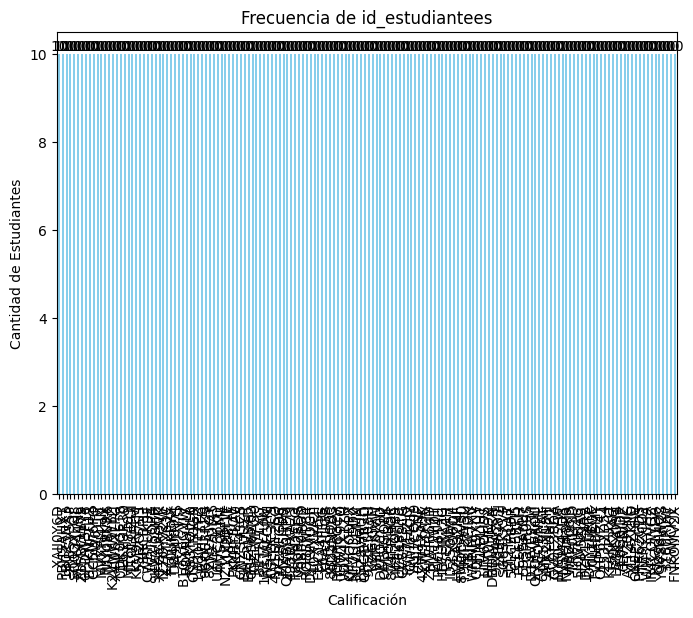

In [51]:
plot_bar('id_estudiante')

- Tipo de variable: categórica nominal
- Utilidad: No util para análisis. Relacionar datos.

In [49]:
# asignatura
random_sample = df['asignatura'].sample(15)
random_sample

637     Matemáticas
574     Matemáticas
570     Matemáticas
549     Matemáticas
787     Matemáticas
416     Matemáticas
441     Matemáticas
1542    Matemáticas
136     Matemáticas
1185    Matemáticas
1027    Matemáticas
1333    Matemáticas
1125    Matemáticas
187     Matemáticas
1081    Matemáticas
Name: asignatura, dtype: object

- Tipo de variable: categórica nominal
- Utilidad: No util, no varía.

In [53]:
# tema
random_sample = df['tema'].sample(15)
random_sample

442      Tema 3
9       Tema 10
474      Tema 5
544      Tema 5
818      Tema 9
1569    Tema 10
210      Tema 1
198      Tema 9
1327     Tema 8
694      Tema 5
416      Tema 7
1101     Tema 2
1599    Tema 10
386      Tema 7
1364     Tema 5
Name: tema, dtype: object

- Tipo de variable: categórica ordinal
- Utilidad: Pude tener utilidad de apoyo a las notas en función del objetivo

In [54]:
# fecha
random_sample = df['fecha'].sample(15)
random_sample

1145   2025-01-19
1400   2024-09-01
604    2024-12-22
1166   2025-02-16
85     2025-01-19
915    2025-01-19
1135   2025-01-19
1205   2025-01-19
49     2025-05-11
478    2025-04-13
1200   2024-09-01
914    2024-12-22
506    2025-02-16
1331   2024-09-29
1506   2025-02-16
Name: fecha, dtype: datetime64[ns]

- Tipo de variable: categórica ordinal, temporal
- Utilidad: Pude tener utilidad de apoyo en función del objetivo

In [55]:
# nota
random_sample = df['nota'].sample(15)
random_sample

1431    6.86
200     6.87
111     6.30
274     5.58
369     7.07
827     5.82
1086    6.09
60      7.32
1398    6.13
733     5.19
1458    7.36
1084    4.59
87      7.18
1483    4.97
1366    4.67
Name: nota, dtype: float64

- Tipo de variable: numérica continua
- Utilidad: objetivo

In [56]:
# calificacion
random_sample = df['calificacion'].sample(15)
random_sample

1326     notable
574     suspenso
289      notable
1599     notable
448     aprobado
193      notable
1554    aprobado
1108    suspenso
951     aprobado
454     aprobado
872     aprobado
170      notable
710      notable
362     aprobado
808     suspenso
Name: calificacion, dtype: object

- Tipo de variable: catagórica nominal
- Utilidad: apoyo en torno al objetivo

In [57]:
# estatura
random_sample = df['estatura'].sample(15)
random_sample

295     175.035655
946     174.818951
1537    167.737564
512     181.948568
493     159.648058
1566    170.165314
1576    171.127570
500     176.374157
160     157.275203
280     182.262446
453     176.779478
348     158.524188
252     182.697742
391     156.704769
1039    186.337382
Name: estatura, dtype: float64

- Tipo de variable: numerica continua
- Utilidad: estudiar en torno al objetivo

In [58]:
# sexo
random_sample = df['sexo'].sample(15)
random_sample

590     H
883     H
1321    M
1347    M
552     H
1009    H
163     H
1107    M
76      H
469     H
37      H
936     M
635     M
1248    H
1418    H
Name: sexo, dtype: object

- Tipo de variable: categórica nominal
- Utilidad: estudiar en torno al objetivo

In [60]:
# tiempo_estudio
random_sample = df['tiempo_estudio'].sample(15)
random_sample

1359    236
137     278
286     267
792     324
115     307
285     333
1565    310
238     235
112     338
1579    305
497     371
1261    237
257     335
1163    384
837     246
Name: tiempo_estudio, dtype: int64

Bordes de los bins: [  0.  25.  50.  75. 100. 125. 150. 175. 200. 225. 250. 275. 300. 325.
 350. 375. 400. 425. 450. 475. 500.]


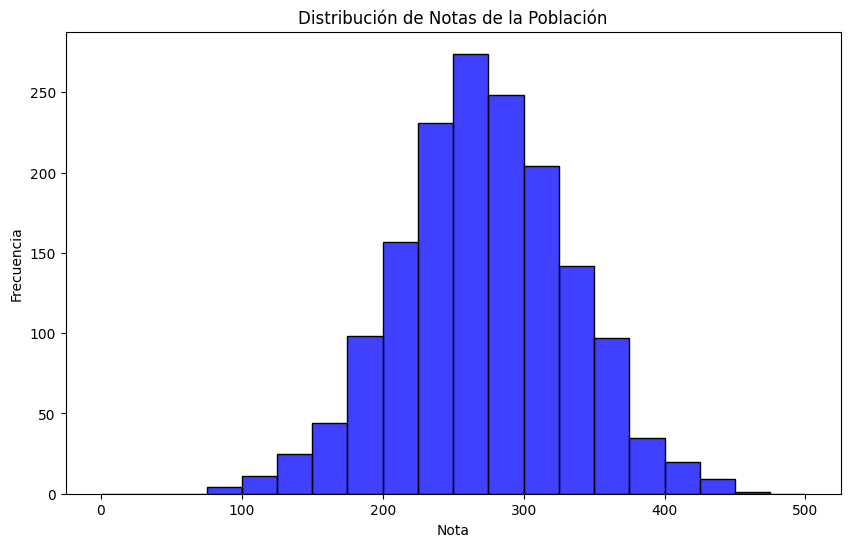

In [63]:
plot_histogram('tiempo_estudio')

- Tipo de variable: numérica discreta
- Utilidad: estudiar en torno al objetivo

In [64]:
# grupo
random_sample = df['grupo'].sample(15)
random_sample

1585    C
1368    C
1262    D
524     D
231     C
184     A
1404    D
453     A
371     C
550     B
796     B
178     A
48      B
1543    B
975     D
Name: grupo, dtype: object

- Tipo de variable: categórica nominal
- Utilidad: apoyo en torno al objetivo

In [65]:
# aprobado
random_sample = df['aprobado'].sample(15)
random_sample

32      1
1565    1
68      1
990     1
1185    1
1136    1
1568    1
398     1
968     1
1531    1
315     1
508     1
588     1
695     1
1535    1
Name: aprobado, dtype: int64

- Tipo de variable: categórica nominal
- Utilidad: apoyo en torno al objetivo

**Bibliografía y referencias**
- Johnson, R. & Kuby, P. (2008). Estadistica elemental: lo esencial (10a ed.). Cengage Learning Editores S.A.
- Freedman, D., Pisani, R., & Purves, R. (2007). Statistics (4a ed.). WW Norton.